# 5. サポートベクターマシン

本書は、機械学習レポートの、サポートベクターマシンについてです。


## 1.1. 要点まとめ

サポートベクターマシン(以降、 SVM と記載)について、
「機械学習 講義資料」の、 Appendix 資料の内容を纏めた。

Appendix 資料では、 SVM を以下に分類している。

- ハードマージン<br>
線形分離可能で、分類境界が明確に分類できるもの。

- ソフトマージン<br>
線形分離不可能だが、線形サポートベクトルで誤差を許容する分類。

- カーネルトリック<br>
線形分離不可能で、カーネル関数を使って非線形に分類。

ハードマージンとソフトマージンの概要の後、 SVM のしくみが整理し、<br>
最後にカーネルトリックについて、説明する構成。


### 2クラス分類

SVM は、特徴ベクトル $ \textbf{x} $ を、$ y = -1, 1 $ の 2 値に分類する、2クラス分類を対象とする、

SVM で分類することを、 SV 分類と呼ぶ。


### 決定関数と分類境界

決定関数は、以下の通り。

$$
f( \textbf{x} ) = \textbf{w}^T \textbf{x} + b
$$

2つのクラスに分類するため、決定関数の符号によって 2 クラスに分類する。

$$
\begin{equation}
y = sgn f( \textbf{x} ) =
\begin{cases}
+1 & (f( \textbf{x} ) \gt 0) \\
-1 & (f( \textbf{x} ) \lt 0) \\
\end{cases}
\end{equation}
$$

また、特徴ベクトルが表す平面と、決定関数の表す平面との交線を分類境界という。


### 線形サポートベクトル分類(ハードマージン)

SVM の用語として以下の確認。

- 訓練データ<br>
特徴ベクトルとラベルのセット $ (x_i, y_i) ( i = 1, 2, \cdots, n ) $

- マージン<br>
分類境界を挟んで 2 のクラスがどれくらい離れているのかの指標。

- マージン最大化<br>
SVM では、できるだけ大きなマージンを持つ分類境界を探す考え方。

- ハードマージン<br>
分類境界で分類できること(分類可能性)を仮定した SV 分類のこと。

- サポートベクトル<br>
分類境界を決める、分類境界に最も近いデータ。


#### SVM の目的関数

マージンを最大化するため、分類境界から近いデータ $ x_i $ との距離から、目的関数は以下となる。

$$
\max_{\textbf{w}, b}
\begin{bmatrix}
\min_i
\frac{
  y_i \begin{bmatrix}
    \textbf{w}^T \textbf{x}_i + b
  \end{bmatrix}
}
{ \Vert \textbf{w} \Vert }
\end{bmatrix}
$$

$
\min_i
y_i \begin{bmatrix}
  \textbf{w}^T \textbf{x}_i + b
\end{bmatrix}
= M( \textbf{w}, b)
$
として、

$$
=
\max_{\textbf{w}, b}
\frac{ M( \textbf{w}, b) }
{ \Vert \textbf{w} \Vert }
$$


#### SVM の制約条件

$$
\min_i
y_i \begin{bmatrix}
  \textbf{w}^T \textbf{x}_i + b
\end{bmatrix}
= M( \textbf{w}, b)
$$

より、
全ての $i$ に対して、

$$
y_i \begin{bmatrix}
  \textbf{w}^T \textbf{x}_i + b
\end{bmatrix}
\geqq M( \textbf{w}, b)
$$


#### 簡素な表式

扱いやすい形に変形すると、

$$
\min_{\textbf{w}, b} \frac{1}{2}, \\
$$

ただし、
全ての $i$ に対して、

$$
y_i \begin{bmatrix}
  \textbf{w}^T \textbf{x}_i + b
\end{bmatrix}
\geqq 1
$$


### 線形サポートベクトル分類(ソフトマージン)

分類誤りを許すように、データに対する誤差を表す、スラック変数 $ \xi $ を導入する。制約条件は以下になる。

$$
y_i [ \textbf{w}^T \textbf{x}_i + b ] \ge 1 - \xi_i (i = 1, \cdots, n)
$$

最適化問題の式は、

$$
\min_{\textbf{w}, b, \xi}
\begin{bmatrix}
\frac{1}{2}
\Vert \textbf{w} \Vert ^2
+
C
\sum_i^n
\xi_i
\end{bmatrix}
$$

ただし、

$$
y_i \begin{bmatrix}
  \textbf{w}^T \textbf{x}_i + b
\end{bmatrix}
\geqq 1 - \xi_i, \xi_i \geqq 0 (i = 1, \cdots, n)
$$

係数 $ C $ は、正則化係数で、ハイパーパラメータ。
$ C \to \infty $ でハードマージンとなる。


### SVM における双対問題

ここまでの最適化問題を、 SV 分類の主問題。

変数を少なくし、分類境界の非線形化で有利となる、等価な双対問題の導出を行う。


### 双対問題の導出

#### ラグランジュ関数と双対問題

ラグランジュ関数を導入する。新たに
$
\alpha = (\alpha_1, \cdots, \alpha_n)^T,
\mu = (\mu_1, \cdots, \mu_n)^T
$
の双対変数を導入した、ラグランジュ関数は以下の通り。

$$
L(\textbf{w}, b, \xi, \alpha, \mu)
=
\frac{1}{2} \Vert \textbf{w} \Vert^2
+
C
\sum_{i = 1}^n
\xi_i
-
\sum_{i = 1}^n
\alpha_i
[
  y_i
  \begin{bmatrix}
    \textbf{w}^T \textbf{x}_i + b
  \end{bmatrix}
  - 1 + \xi_i
]
-
\sum_{i = 1}^n
\mu_i \xi_i
$$

双対問題は、ラグランジュ関数の最適化問題。

$$
\max_{\alpha, \mu}
\min_{\textbf{w}, b, \xi} L(\textbf{w}, b, \xi, \alpha, \mu)
$$


#### 最大化問題の対象となる式

双対問題である
$ L(\textbf{w}, b, \xi, \alpha, \mu) $
の最適解
$ (\textbf{w}^{*}, b^{*}, \xi^{*}) $
を使って展開し、
$ \alpha $ のみの関数にすることができる。

$$
\max_{\alpha, \mu}
\min_{\textbf{w}, b, \xi} L(\textbf{w}, b, \xi, \alpha, \mu)
=
\max_{\alpha, \mu}
L(\textbf{w}^{*}, b^{*}, \xi^{*}, \alpha, \mu) \\
=
\max_{\alpha}
\begin{bmatrix}
-\frac{1}{2}
\sum_{i = 1}^n
\sum_{j = 1}^n
\alpha_i \alpha_j
y_i y_j
\textbf{x}_i^T \textbf{x}_j
+
\sum_{i = 1}^n
\alpha_i
\end{bmatrix}
$$

ただし、

$$
\sum_{i = 1}^n
\alpha_i y_i = 0, 0 \leqq \alpha_i \leqq C
(i = 1, \cdots, n)
$$


### 主問題と双対問題の関係

SV 分類での、主問題と双対問題の関数は、他の最適化問題が弱双対性であることに対して、強双対性であり、目的関数値が最適解に一致する。よって、双対問題の最適解で SV 分類を行うことができる。


### カーネルを用いた非線形分離への拡張


#### 高次元への写像と目的関数

$ n $ 次元から、 $ r $ 次元への変換を行う。高次元データへ写像する関数を $ \phi(\textbf{x}) $ とする。

$$
\phi(\textbf{x})
=
\begin{pmatrix}
\phi_1(x) \\
\vdots \\
\phi_r(x) \\
\end{pmatrix}
$$

目的関数は、以下となる。

$$
\max_{\alpha}
\begin{bmatrix}
-\frac{1}{2}
\sum_{i = 1}^n
\sum_{j = 1}^n
\alpha_i \alpha_j
y_i y_j
\phi(x_i)^T \phi(x_j)
+
\sum_{i = 1}^n
\alpha_i
\end{bmatrix}
$$


#### カーネル関数

$ \phi(x_i)^T \phi(x_j) $ の内積計算量が膨大となるため、カーネル関数を使って簡略化する。

- カーネル関数<br>
$$
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

双対問題は以下の式となる。

$$
\begin{equation}
\begin{cases}
\max_{\alpha}
\begin{bmatrix}
-\frac{1}{2}
\sum_{i = 1}^n
\sum_{j = 1}^n
\alpha_i \alpha_j
y_i y_j
K(x_i, x_j)
+
\sum_{i = 1}^n
\alpha_i
\end{bmatrix}
\\
ただし、
\sum_{i = 1}^n
\alpha_i y_i = 0,
0 \leqq \alpha_i
(i = 1, \cdots, n)
\end{cases}
\end{equation}
$$

カーネル関数には、例えば、ガウスカーネル ( RBF カーネル ) がある。

- ガウスカーネル<br>
$$
K(x_i, x_j) = exp(-\gamma \Vert x_i - x_j \Vert^2)
$$


## 1.2. 実装演習


### np_svm.ipynb


#### キャプチャ

自身の環境において、最終コードセル[19]までの実行を確認した。


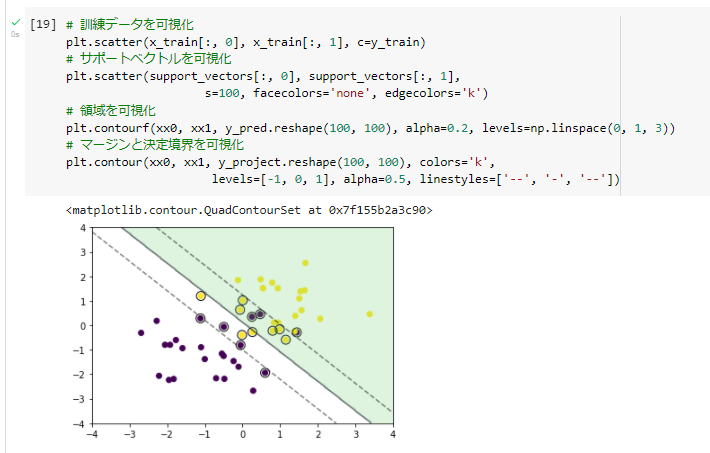

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


##### 線形分離可能: Lagrange multiplier

コードセル[4] の `np.where` の操作について、確認した。

- https://numpy.org/doc/stable/reference/generated/numpy.where.html<br>
> Return elements chosen from x or y depending on condition.


以下コードにより、 `np.outer` の操作を確認した。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# size = 50
size = 4
x0 = np.random.normal(size=size).reshape(-1, 2) - 2.
x1 = np.random.normal(size=size).reshape(-1, 2) + 2.
X_train = np.concatenate([x0, x1])
print("X_train.shape={}".format(X_train.shape))
print("X_train={}".format(X_train))


X_train.shape=(4, 2)
X_train=[[-0.99176322 -2.65455206]
 [ 0.06850194 -2.01371147]
 [ 1.716548    2.01278454]
 [ 2.1450717   2.60936164]]


In [ ]:
print("X_train.T.shape={}".format(X_train.T.shape))
print("X_train.T={}".format(X_train.T))


X_train.T.shape=(2, 4)
X_train.T=[[-0.99176322  0.06850194  1.716548    2.1450717 ]
 [-2.65455206 -2.01371147  2.01278454  2.60936164]]


In [ ]:
K = X_train.dot(X_train.T)
K

array([[ 8.03024095,  5.27756421, -7.04545054, -9.05408954],
       [ 5.27756421,  4.05972638, -3.93558044, -5.10755986],
       [-7.04545054, -3.93558044,  6.99783866,  8.93420132],
       [-9.05408954, -5.10755986,  8.93420132, 11.41010077]])

In [ ]:
xy = np.array([[1, 2], [3, 4], [5, 6]])
xy

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
xy.T

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
xy.dot(xy.T)

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [ ]:
# `H = np.outer(t, t) * K`?
ys_train = np.concatenate([np.zeros(int(size/2)), np.ones(int(size/2))]).astype(np.int)
t = np.where(ys_train == 1.0, 1.0, -1.0)
t

array([-1., -1.,  1.,  1.])

In [ ]:
np.outer(t, t)

array([[ 1.,  1., -1., -1.],
       [ 1.,  1., -1., -1.],
       [-1., -1.,  1.,  1.],
       [-1., -1.,  1.,  1.]])

In [ ]:
np.outer(t, t) * K

array([[ 8.03024095,  5.27756421,  7.04545054,  9.05408954],
       [ 5.27756421,  4.05972638,  3.93558044,  5.10755986],
       [ 7.04545054,  3.93558044,  6.99783866,  8.93420132],
       [ 9.05408954,  5.10755986,  8.93420132, 11.41010077]])

In [ ]:
# `index = a > 1e-6`?
np.outer(t, t) > 0

array([[ True,  True, False, False],
       [ True,  True, False, False],
       [False, False,  True,  True],
       [False, False,  True,  True]])

In [ ]:
np.outer(t, t)[np.outer(t, t) > 0]

array([1., 1., 1., 1., 1., 1., 1., 1.])

コードセル[5] において、サポートベクトルのみを抽出していることを確認した。


コードセル[7] の以下のグラフの線 (pink) については、意味を理解することができなかった。


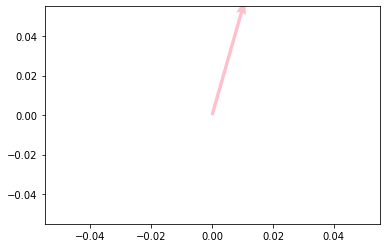

In [ ]:
# `plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')`?
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')


##### 線形分離不可能: RBF kernel ( gaussian kernel )


コードセル[18]の `rbf(u, v)` の、 RBF の式を確認した。


$$
\phi_{j}(x) = \mathrm{e} \{ \frac{(x - \mu_i)^2}{2h_j} \}
=
\phi_{j}(x) = \mathrm{e} \{ \frac{(x - \mu_i)^2}{\sigma^2} \}
$$


"予測" の `temp2' の部分が以下であることを確認した。

ここでの、 $ K, \boldsymbol{a}, \boldsymbol{t} $ は、 `index` である support vectors の要素のみを含むものとする。

$$
term2 = K ( \boldsymbol{a} \times \boldsymbol{t} )
$$

$ K $ は、<br>
`rbf()` を、 $ k(\boldsymbol{x}_{i}, \boldsymbol{x}_{j}) $ とすると、

$$
\begin{pmatrix}
k(\boldsymbol{x}_{1}, \boldsymbol{x}_{1}) & \dots & k(\boldsymbol{x}_{1}, \boldsymbol{x}_{n}) \\
\cdots \\
k(\boldsymbol{n}_{1}, \boldsymbol{x}_{1}) & \dots & k(\boldsymbol{x}_{n}, \boldsymbol{x}_{n})
\end{pmatrix}
$$

この中で、 $ \boldsymbol{a} $ が有効 ( `index = a > 1e-6`: 数式では $ a_{i} > 0 $ ) である成分。


##### ソフトマージン SVM


学習において、 `a = np.clip(a, 0, C)` で、$ 0 \leqq C \leqq 1 $ の誤差の、許容度が与えられていることを確認した。
